In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
import pickle

In [0]:
X_train = pickle.load(open('/content/drive/My Drive/pTSA_microlensing/X_train.p', 'rb'))
y_train = pickle.load(open('/content/drive/My Drive/pTSA_microlensing/y_train.p', 'rb'))
X_test  = pickle.load(open('/content/drive/My Drive/pTSA_microlensing/X_test.p', 'rb'))
y_test  = pickle.load(open('/content/drive/My Drive/pTSA_microlensing/y_test.p', 'rb'))
X_dev   = pickle.load(open('/content/drive/My Drive/pTSA_microlensing/X_dev.p', 'rb'))
y_dev   = pickle.load(open('/content/drive/My Drive/pTSA_microlensing/y_dev.p', 'rb'))

In [0]:
X_train_arima_0_0_1   = pickle.load(open('/content/drive/My Drive/pTSA_microlensing/X_train_arima_0_0_1.p', 'rb'))
X_test_arima_0_0_1   = pickle.load(open('/content/drive/My Drive/pTSA_microlensing/X_test_arima_0_0_1.p', 'rb'))
X_dev_arima_0_0_1   = pickle.load(open('/content/drive/My Drive/pTSA_microlensing/X_dev_arima_0_0_1.p', 'rb'))
X_train_arima_0_0_2   = pickle.load(open('/content/drive/My Drive/pTSA_microlensing/X_train_arima_0_0_2.p', 'rb'))
X_test_arima_0_0_2   = pickle.load(open('/content/drive/My Drive/pTSA_microlensing/X_test_arima_0_0_2.p', 'rb'))
X_dev_arima_0_0_2   = pickle.load(open('/content/drive/My Drive/pTSA_microlensing/X_dev_arima_0_0_2.p', 'rb'))
X_train_arima_1_0_0   = pickle.load(open('/content/drive/My Drive/pTSA_microlensing/X_train_arima_1_0_0.p', 'rb'))
X_test_arima_1_0_0   = pickle.load(open('/content/drive/My Drive/pTSA_microlensing/X_test_arima_1_0_0.p', 'rb'))
X_dev_arima_1_0_0   = pickle.load(open('/content/drive/My Drive/pTSA_microlensing/X_dev_arima_1_0_0.p', 'rb'))

X_train_arima_1_0_1   = pickle.load(open('/content/drive/My Drive/pTSA_microlensing/X_train_arima_1_0_1.p', 'rb'))
X_test_arima_1_0_1   = pickle.load(open('/content/drive/My Drive/pTSA_microlensing/X_test_arima_1_0_1.p', 'rb'))
X_dev_arima_1_0_1   = pickle.load(open('/content/drive/My Drive/pTSA_microlensing/X_dev_arima_1_0_1.p', 'rb'))

In [0]:
# Load MOA data
X_gb_events = pickle.load(open('/content/drive/My Drive/pTSA_microlensing/X_gb_events.p', 'rb'))
X_gb_events_arima_0_0_2 = pickle.load(open('/content/drive/My Drive/pTSA_microlensing/X_gb_events_arima_0_0_2.p', 'rb'))

In [0]:
X_gb_events_arima_0_0_1 = pickle.load(open('/content/drive/My Drive/pTSA_microlensing/X_gb_events_arima_0_0_1.p', 'rb'))
X_gb_events_arima_1_0_0 = pickle.load(open('/content/drive/My Drive/pTSA_microlensing/X_gb_events_arima_1_0_0.p', 'rb'))
X_gb_events_arima_1_0_1 = pickle.load(open('/content/drive/My Drive/pTSA_microlensing/X_gb_events_arima_1_0_1.p', 'rb'))


In [6]:
%tensorflow_version 2.x

TensorFlow 2.x selected.


In [0]:
import itertools
import numpy as np
from sklearn.metrics import precision_recall_curve
from matplotlib import pyplot as plt
from IPython.display import set_matplotlib_formats
%matplotlib inline
set_matplotlib_formats('png')

In [0]:
def plot_data(X, y_label=None, y_pred=None, rows=5, cols=4):
    """Plot the light curve and the associated label. Trims zeroes in X"""
    plot=plt.figure(figsize=(rows * 4, 15))
    for i in range(rows * cols):
        plt.subplot(rows,cols,i+1)
        last_nonzero = np.max(np.nonzero(X[i,:,0]))
        plt.plot(X[i,:last_nonzero,0], '#a0a0a0', label='Light Curve')
        if y_label is not None:
            plt.plot(y_label[i,:last_nonzero], 'r', label='Label')
        if y_pred is not None:
            plt.plot(y_pred[i,:last_nonzero], 'b', label='Prediction')
        if i == 0:
            plt.legend()

    return plot


def plot_history(lc):
    plot=plt.figure()
    plt.plot(lc.history['f1_m'], label = 'Training F1')
    plt.plot(lc.history['val_f1_m'], label = 'Validation F1')
    plt.legend()
    return plot


def plot_curve(y_label, y_pred):
    label_cast_flat = list(itertools.chain(*y_label.astype(int)))
    pred_flat = list(itertools.chain(*y_pred))
    precision, recall, threshold = precision_recall_curve(label_cast_flat, pred_flat)
    f1 = 2 * (precision * recall) / (precision + recall)
    plot = plt.figure()
    plt.plot(threshold, precision[1:], label='Precision')
    plt.plot(threshold, recall[1:], label='Recall')
    plt.plot(threshold, f1[1:], label='F1')
    plt.legend()
    print('Best threshold: ', threshold[np.argmax(f1)-1])
    print('Best F1-Score: ', np.max(f1))
    return plot

In [0]:
from tensorflow.keras import backend as K

def recall_m(y_true, y_pred):
        true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
        possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
        recall = true_positives / (possible_positives + K.epsilon())
        return recall

def precision_m(y_true, y_pred):
        true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
        predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
        precision = true_positives / (predicted_positives + K.epsilon())
        return precision
    
def f1_m(y_true, y_pred):
    precision = precision_m(y_true, y_pred)
    recall = recall_m(y_true, y_pred)
    return 2*((precision*recall)/(precision+recall+K.epsilon()))

import tensorflow as tf
from tensorflow.keras import layers

In [0]:
def dev_curve(model, X_dev):
    pred = model.predict_proba(X_dev)
    return plot_curve(y_dev, pred)

In [0]:
import numpy as np
import tensorflow as tf
import random as rn

def reset_seed():
    np.random.seed(42)
    rn.seed(12345)
    tf.random.set_seed(1234)

## GRU 2 Arima(0,0,1) (non-residual)

In [12]:
# GRU double layer

gru_2 = tf.keras.Sequential()

# Adding the first layer
gru_2.add(layers.GRU(units=200, return_sequences=True, input_shape=(None, 2)))
gru_2.add(layers.Dropout(0.2))

gru_2.add(layers.GRU(units=100, return_sequences=True, input_shape=(None, 200)))
gru_2.add(layers.Dropout(0.2))


# Output layer
gru_2.add(layers.Dense(units=1, activation='sigmoid'))

gru_2.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc', f1_m])
gru_2.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
gru (GRU)                    (None, None, 200)         122400    
_________________________________________________________________
dropout (Dropout)            (None, None, 200)         0         
_________________________________________________________________
gru_1 (GRU)                  (None, None, 100)         90600     
_________________________________________________________________
dropout_1 (Dropout)          (None, None, 100)         0         
_________________________________________________________________
dense (Dense)                (None, None, 1)           101       
Total params: 213,101
Trainable params: 213,101
Non-trainable params: 0
_________________________________________________________________


In [13]:
X_train_arima = np.concatenate((X_train ,X_train_arima_0_0_1), axis=2)
X_test_arima = np.concatenate((X_test ,X_test_arima_0_0_1), axis=2)
X_dev_arima = np.concatenate((X_dev ,X_dev_arima_0_0_1), axis=2)

# X_train_arima = np.concatenate((X_train ,X_train_arima_0_0_2), axis=2)
# X_test_arima = np.concatenate((X_test ,X_test_arima_0_0_2), axis=2)
# X_dev_arima = np.concatenate((X_dev ,X_dev_arima_0_0_2), axis=2)

X_train_arima.shape, X_test_arima.shape, X_dev_arima.shape

((500, 1000, 2), (100, 1000, 2), (100, 2000, 2))

In [14]:
reset_seed()
lc_gru_2=gru_2.fit(X_train_arima, y_train, batch_size=32, epochs=50, validation_data=(X_test_arima, y_test), verbose=1, workers=4)


Train on 500 samples, validate on 100 samples
Epoch 1/50
500/500 [==============================] - 9s 19ms/sample - loss: 0.3500 - acc: 0.9351 - f1_m: 0.3731 - val_loss: 0.1196 - val_acc: 0.9632 - val_f1_m: 0.6983
Epoch 2/50
500/500 [==============================] - 2s 4ms/sample - loss: 0.0773 - acc: 0.9709 - f1_m: 0.5820 - val_loss: 0.0780 - val_acc: 0.9695 - val_f1_m: 0.6497
Epoch 3/50
500/500 [==============================] - 2s 4ms/sample - loss: 0.0697 - acc: 0.9727 - f1_m: 0.6249 - val_loss: 0.0717 - val_acc: 0.9706 - val_f1_m: 0.7303
Epoch 4/50
500/500 [==============================] - 2s 4ms/sample - loss: 0.0660 - acc: 0.9722 - f1_m: 0.6277 - val_loss: 0.0687 - val_acc: 0.9719 - val_f1_m: 0.6989
Epoch 5/50
500/500 [==============================] - 2s 4ms/sample - loss: 0.0624 - acc: 0.9726 - f1_m: 0.6242 - val_loss: 0.0693 - val_acc: 0.9703 - val_f1_m: 0.7307
Epoch 6/50
500/500 [==============================] - 2s 4ms/sample - loss: 0.0619 - acc: 0.9722 - f1_m: 0.6156 -

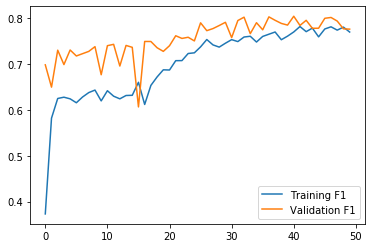

In [15]:
plot=plot_history(lc_gru_2)
# plot.savefig('/content/drive/My Drive/pTSA_microlensing/graph_arima/lc_gru_2_arima_0_0_1.svg')
plot.show()

Best threshold:  0.3396241
Best F1-Score:  0.7504564235610647


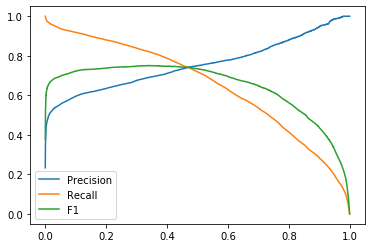

In [16]:
plot=dev_curve(gru_2, X_dev_arima)
# plot.savefig('/content/drive/My Drive/pTSA_microlensing/graph_arima/gru_2_dev_arima_0_0_1.svg')
plot.show()

In [17]:
gru_2.evaluate(X_dev_arima, y_dev)

100/1 [=================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

[0.05794176422059536, 0.9752149, 0.5537683]

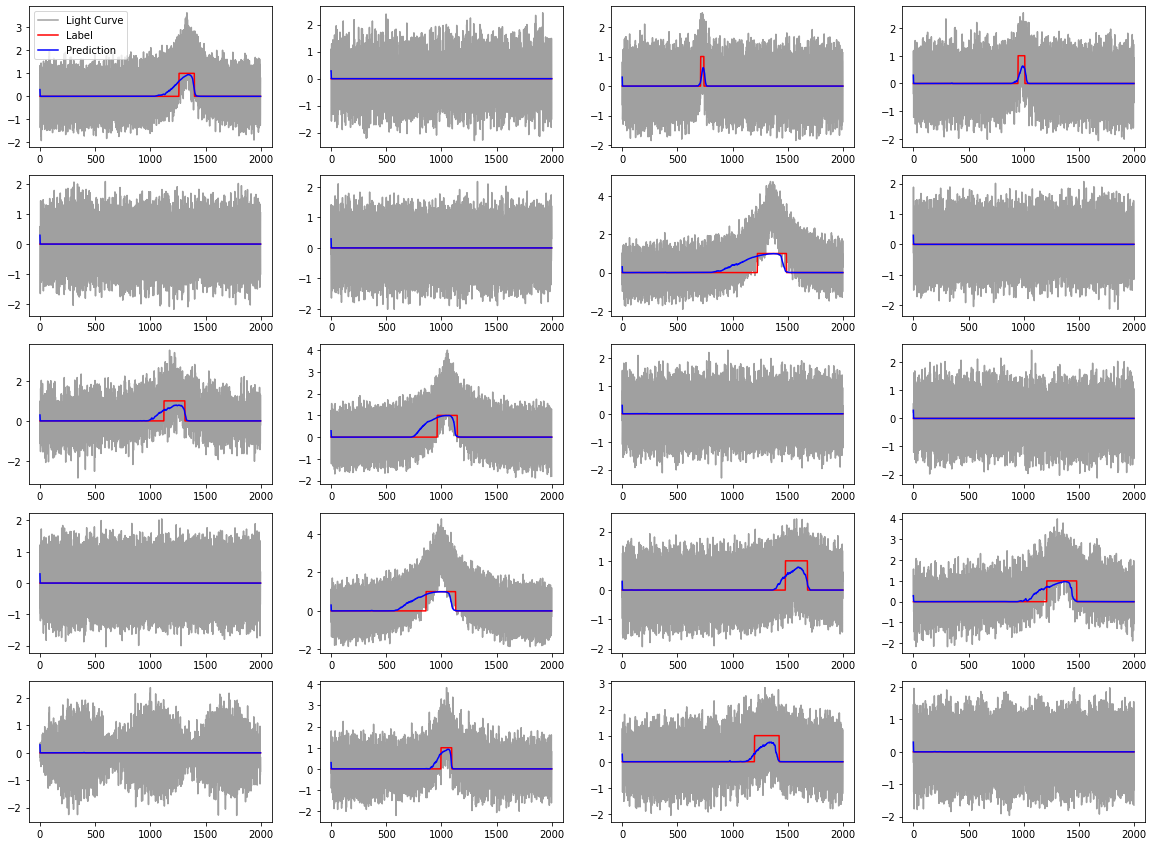

In [18]:
plot=plot_data(X_dev_arima, y_dev, gru_2.predict_proba(X_dev_arima))
# plot.savefig('/content/drive/My Drive/pTSA_microlensing/graph_arima/gru_2_dev_arima_0_0_1_example.svg')
plot.show()

In [20]:
X_gb_events.shape, X_gb_events_arima_0_0_1.shape

((103, 8243, 1), (10, 8243, 1))

In [21]:
X_gb_events_arima = np.concatenate((X_gb_events[:10,:,:] ,X_gb_events_arima_0_0_1), axis=2)
X_gb_events_arima.shape

(10, 8243, 2)

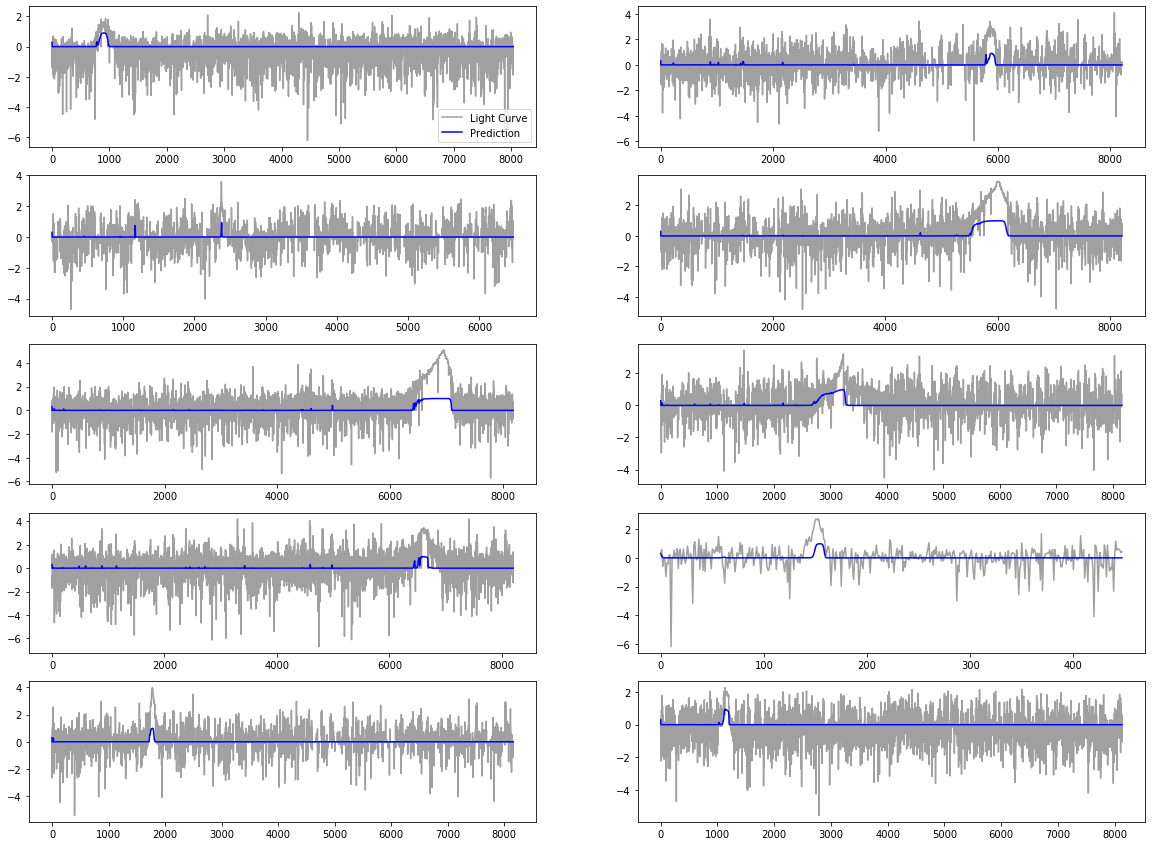

In [22]:
plot=plot_data(X_gb_events_arima, y_pred=gru_2.predict_proba(X_gb_events_arima), cols=2)
plot.savefig('/content/drive/My Drive/pTSA_microlensing/graph/gru_2_dev_arima_0_0_1_to_real.svg')
plot.show()

## GRU 2 Arima(0,0,1) (residual)

In [23]:
# GRU double layer

gru_2 = tf.keras.Sequential()

# Adding the first layer
gru_2.add(layers.GRU(units=200, return_sequences=True, input_shape=(None, 2)))
gru_2.add(layers.Dropout(0.2))

gru_2.add(layers.GRU(units=100, return_sequences=True, input_shape=(None, 200)))
gru_2.add(layers.Dropout(0.2))


# Output layer
gru_2.add(layers.Dense(units=1, activation='sigmoid'))

gru_2.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc', f1_m])
gru_2.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
gru_2 (GRU)                  (None, None, 200)         122400    
_________________________________________________________________
dropout_2 (Dropout)          (None, None, 200)         0         
_________________________________________________________________
gru_3 (GRU)                  (None, None, 100)         90600     
_________________________________________________________________
dropout_3 (Dropout)          (None, None, 100)         0         
_________________________________________________________________
dense_1 (Dense)              (None, None, 1)           101       
Total params: 213,101
Trainable params: 213,101
Non-trainable params: 0
_________________________________________________________________


In [24]:
X_train_arima = np.concatenate((X_train ,X_train-X_train_arima_0_0_1), axis=2)
X_test_arima = np.concatenate((X_test ,X_test-X_test_arima_0_0_1), axis=2)
X_dev_arima = np.concatenate((X_dev ,X_dev-X_dev_arima_0_0_1), axis=2)

# X_train_arima = np.concatenate((X_train ,X_train_arima_0_0_2), axis=2)
# X_test_arima = np.concatenate((X_test ,X_test_arima_0_0_2), axis=2)
# X_dev_arima = np.concatenate((X_dev ,X_dev_arima_0_0_2), axis=2)

X_train_arima.shape, X_test_arima.shape, X_dev_arima.shape

((500, 1000, 2), (100, 1000, 2), (100, 2000, 2))

In [25]:
reset_seed()
lc_gru_2=gru_2.fit(X_train_arima, y_train, batch_size=32, epochs=50, validation_data=(X_test_arima, y_test), verbose=1, workers=4)


Train on 500 samples, validate on 100 samples
Epoch 1/50
500/500 [==============================] - 5s 11ms/sample - loss: 0.3670 - acc: 0.9294 - f1_m: 0.3119 - val_loss: 0.1203 - val_acc: 0.9654 - val_f1_m: 0.6934
Epoch 2/50
500/500 [==============================] - 2s 4ms/sample - loss: 0.0726 - acc: 0.9735 - f1_m: 0.6223 - val_loss: 0.0855 - val_acc: 0.9670 - val_f1_m: 0.7234
Epoch 3/50
500/500 [==============================] - 2s 4ms/sample - loss: 0.0662 - acc: 0.9728 - f1_m: 0.6272 - val_loss: 0.0796 - val_acc: 0.9660 - val_f1_m: 0.7178
Epoch 4/50
500/500 [==============================] - 2s 4ms/sample - loss: 0.0660 - acc: 0.9712 - f1_m: 0.5972 - val_loss: 0.0697 - val_acc: 0.9697 - val_f1_m: 0.7226
Epoch 5/50
500/500 [==============================] - 2s 4ms/sample - loss: 0.0612 - acc: 0.9730 - f1_m: 0.6372 - val_loss: 0.0673 - val_acc: 0.9709 - val_f1_m: 0.7321
Epoch 6/50
500/500 [==============================] - 2s 4ms/sample - loss: 0.0596 - acc: 0.9730 - f1_m: 0.6201 -

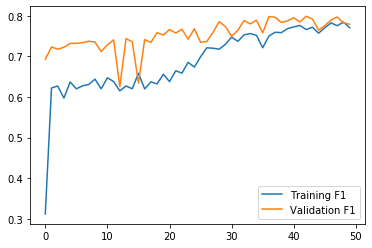

In [26]:
plot=plot_history(lc_gru_2)
# plot.savefig('/content/drive/My Drive/pTSA_microlensing/graph_arima/lc_gru_2_arima_0_0_1_res.svg')
plot.show()

Best threshold:  0.31281847
Best F1-Score:  0.7710922787193973


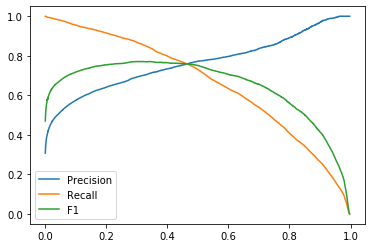

In [27]:
plot=dev_curve(gru_2, X_dev_arima)
# plot.savefig('/content/drive/My Drive/pTSA_microlensing/graph_arima/gru_2_dev_arima_0_0_1_res.svg')
plot.show()

In [28]:
gru_2.evaluate(X_dev_arima, y_dev)

100/1 [=================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

[0.049911339432001114, 0.97696996, 0.56704694]

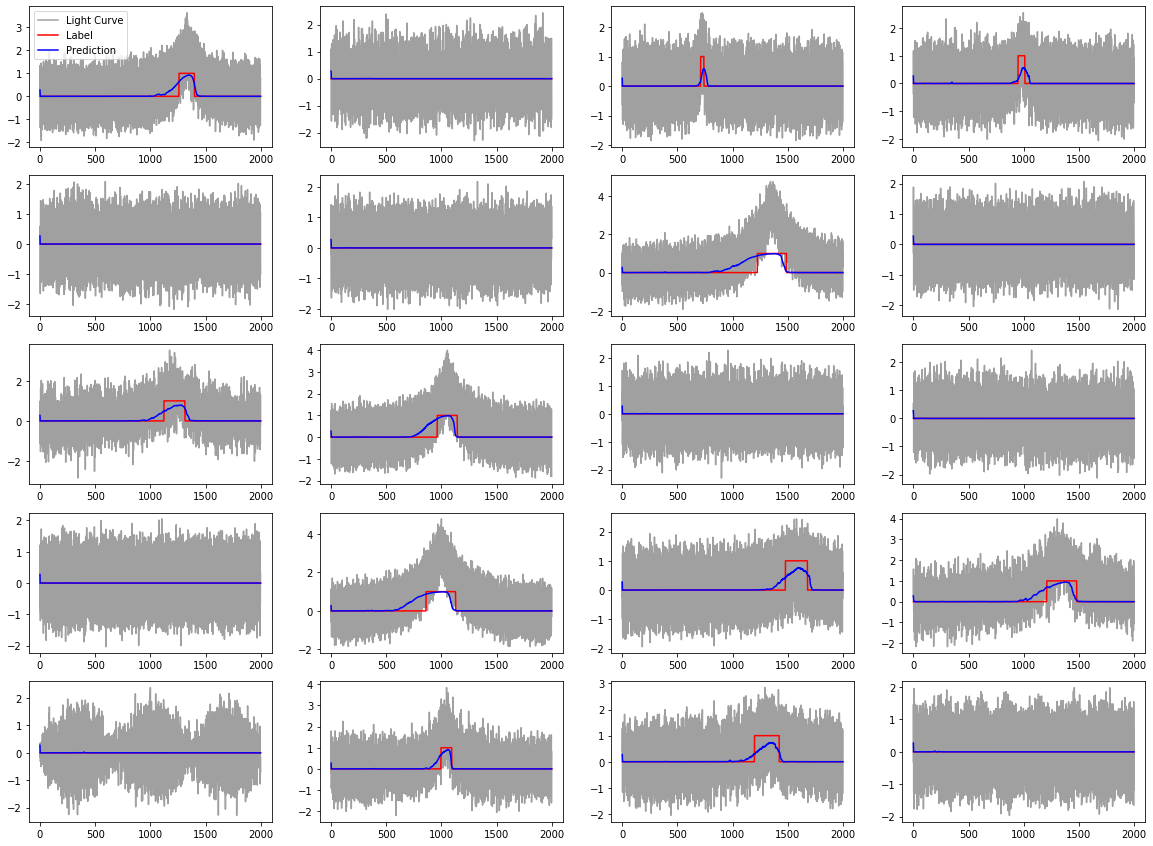

In [29]:
plot=plot_data(X_dev_arima, y_dev, gru_2.predict_proba(X_dev_arima))
# plot.savefig('/content/drive/My Drive/pTSA_microlensing/graph_arima/gru_2_dev_arima_0_0_1_res_example.svg')
plot.show()

In [30]:
X_gb_events.shape, X_gb_events_arima_0_0_1.shape

((103, 8243, 1), (10, 8243, 1))

In [33]:
X_gb_events_arima = np.concatenate((X_gb_events[:10,:,:] ,X_gb_events[:10,:,:]-X_gb_events_arima_0_0_1), axis=2)
X_gb_events_arima.shape

(10, 8243, 2)

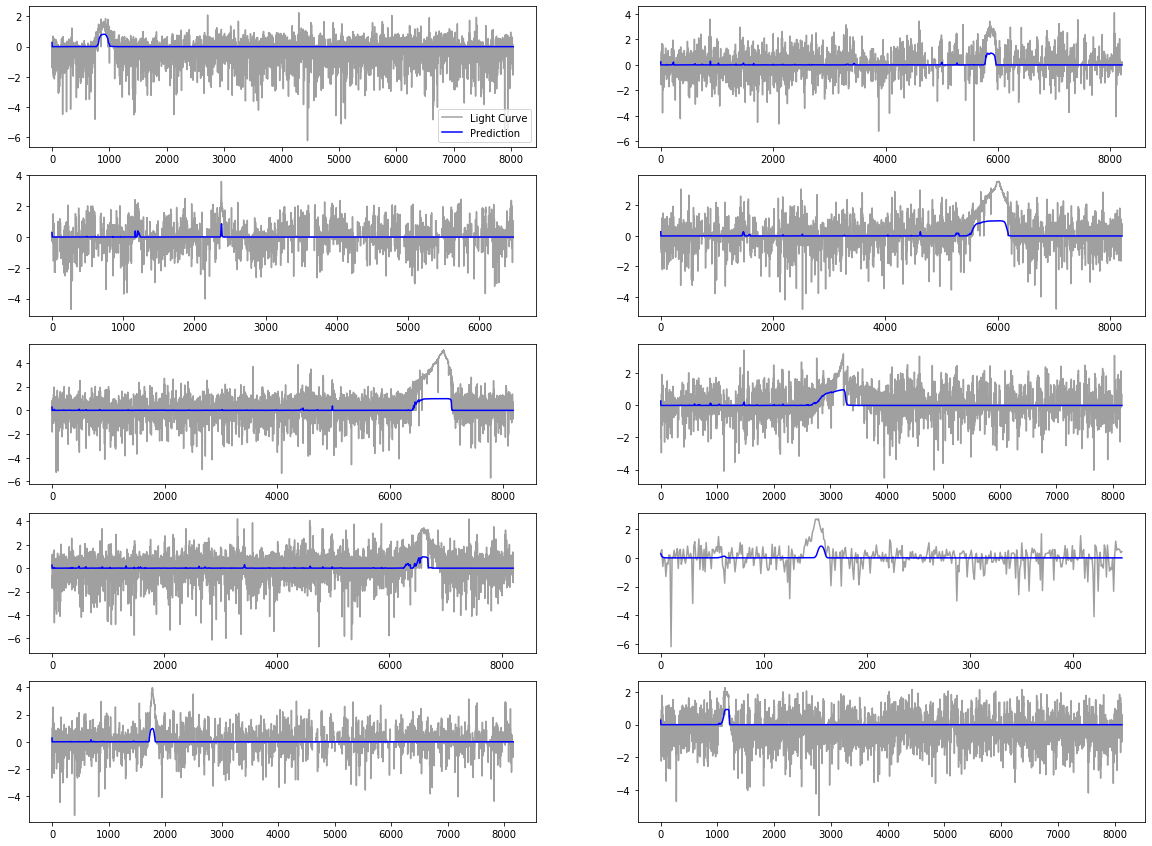

In [35]:
plot=plot_data(X_gb_events_arima, y_pred=gru_2.predict_proba(X_gb_events_arima), cols=2)
plot.savefig('/content/drive/My Drive/pTSA_microlensing/graph/gru_2_dev_arima_0_0_1_res_to_real.svg')
plot.show()

# GRU 2 ARIMA (0,0,2) (non-residual)

In [0]:
# GRU double layer

gru_2 = tf.keras.Sequential()

# Adding the first layer
gru_2.add(layers.GRU(units=200, return_sequences=True, input_shape=(None, 2)))
gru_2.add(layers.Dropout(0.2))

gru_2.add(layers.GRU(units=100, return_sequences=True, input_shape=(None, 200)))
gru_2.add(layers.Dropout(0.2))


# Output layer
gru_2.add(layers.Dense(units=1, activation='sigmoid'))

gru_2.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc', f1_m])
gru_2.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
gru_2 (GRU)                  (None, None, 200)         122400    
_________________________________________________________________
dropout_2 (Dropout)          (None, None, 200)         0         
_________________________________________________________________
gru_3 (GRU)                  (None, None, 100)         90600     
_________________________________________________________________
dropout_3 (Dropout)          (None, None, 100)         0         
_________________________________________________________________
dense_1 (Dense)              (None, None, 1)           101       
Total params: 213,101
Trainable params: 213,101
Non-trainable params: 0
_________________________________________________________________


In [0]:
# X_train_arima = np.concatenate((X_train ,X_train_arima_0_0_1), axis=2)
# X_test_arima = np.concatenate((X_test ,X_test_arima_0_0_1), axis=2)
# X_dev_arima = np.concatenate((X_dev ,X_dev_arima_0_0_1), axis=2)

X_train_arima = np.concatenate((X_train ,X_train_arima_0_0_2), axis=2)
X_test_arima = np.concatenate((X_test ,X_test_arima_0_0_2), axis=2)
X_dev_arima = np.concatenate((X_dev ,X_dev_arima_0_0_2), axis=2)

X_train_arima.shape, X_test_arima.shape, X_dev_arima.shape

((500, 1000, 2), (100, 1000, 2), (100, 2000, 2))

In [0]:
reset_seed()
lc_gru_2=gru_2.fit(X_train_arima, y_train, batch_size=32, epochs=50, validation_data=(X_test_arima, y_test), verbose=1, workers=4)


Train on 500 samples, validate on 100 samples
Epoch 1/50
500/500 [==============================] - 6s 11ms/sample - loss: 0.3619 - acc: 0.9300 - f1_m: 0.2685 - val_loss: 0.1432 - val_acc: 0.9611 - val_f1_m: 0.6964
Epoch 2/50
500/500 [==============================] - 2s 4ms/sample - loss: 0.0908 - acc: 0.9694 - f1_m: 0.5729 - val_loss: 0.0908 - val_acc: 0.9685 - val_f1_m: 0.7242
Epoch 3/50
500/500 [==============================] - 2s 4ms/sample - loss: 0.0707 - acc: 0.9729 - f1_m: 0.6245 - val_loss: 0.0755 - val_acc: 0.9695 - val_f1_m: 0.7360
Epoch 4/50
500/500 [==============================] - 2s 4ms/sample - loss: 0.0667 - acc: 0.9710 - f1_m: 0.6089 - val_loss: 0.0687 - val_acc: 0.9712 - val_f1_m: 0.7063
Epoch 5/50
500/500 [==============================] - 2s 4ms/sample - loss: 0.0615 - acc: 0.9724 - f1_m: 0.6210 - val_loss: 0.0695 - val_acc: 0.9700 - val_f1_m: 0.7219
Epoch 6/50
500/500 [==============================] - 2s 4ms/sample - loss: 0.0608 - acc: 0.9730 - f1_m: 0.6181 -

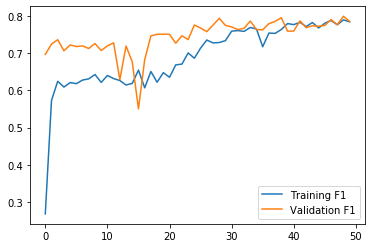

In [0]:
plot=plot_history(lc_gru_2)
# plot.savefig('/content/drive/My Drive/pTSA_microlensing/graph_arima/lc_gru_2_arima_0_0_2.svg')
plot.show()

Best threshold:  0.31326193
Best F1-Score:  0.7887755590671839


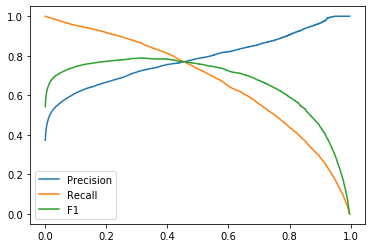

In [0]:
plot=dev_curve(gru_2, X_dev_arima)
# plot.savefig('/content/drive/My Drive/pTSA_microlensing/graph_arima/gru_2_dev_arima_0_0_2.svg')
plot.show()

In [0]:
gru_2.evaluate(X_dev_arima, y_dev)

100/1 [=================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

[0.0465305308252573, 0.97786, 0.5738112]

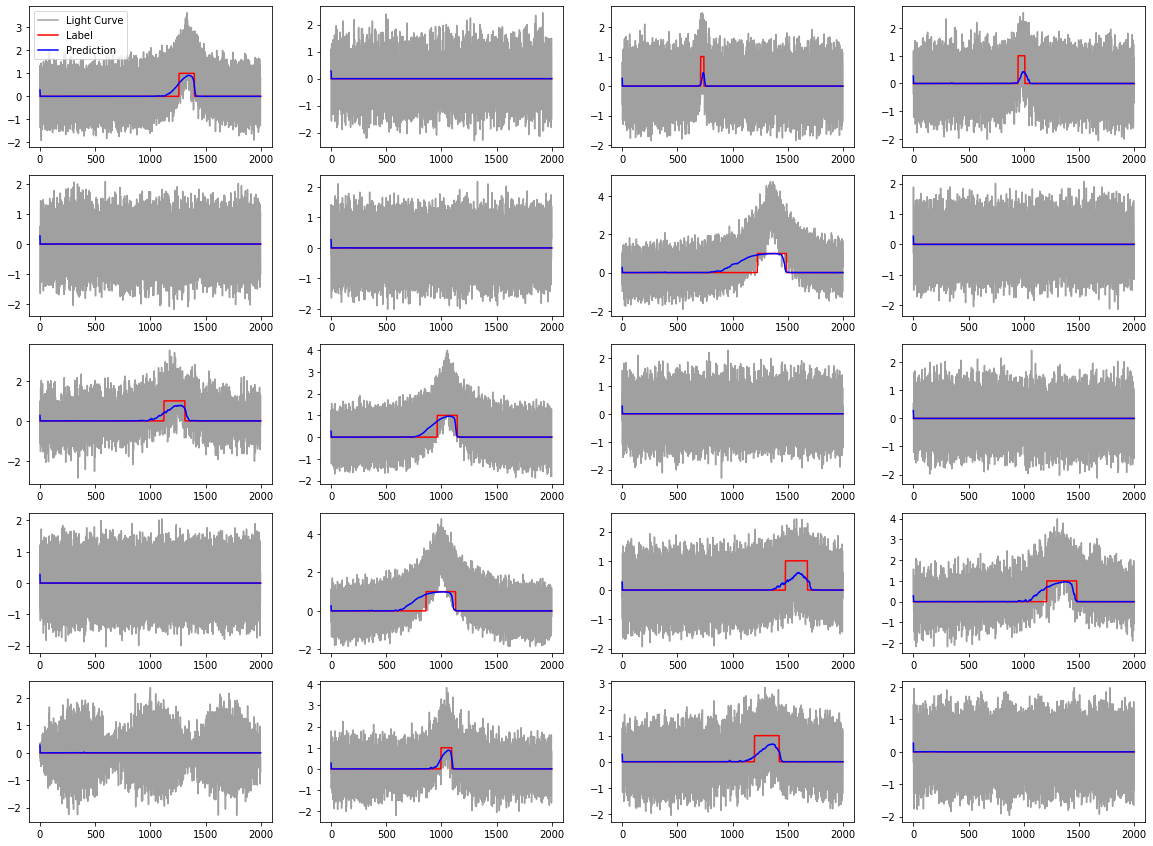

In [0]:
plot=plot_data(X_dev_arima, y_dev, gru_2.predict_proba(X_dev_arima))
# plot.savefig('/content/drive/My Drive/pTSA_microlensing/graph_arima/gru_2_dev_arima_0_0_2_example.svg')
plot.show()

In [0]:
X_gb_events.shape, X_gb_events_arima_0_0_2.shape

((103, 8243, 1), (10, 8243, 1))

In [0]:
X_gb_events_arima = np.concatenate((X_gb_events[:10,:,:] ,X_gb_events_arima_0_0_2), axis=2)
X_gb_events_arima.shape

(10, 8243, 2)

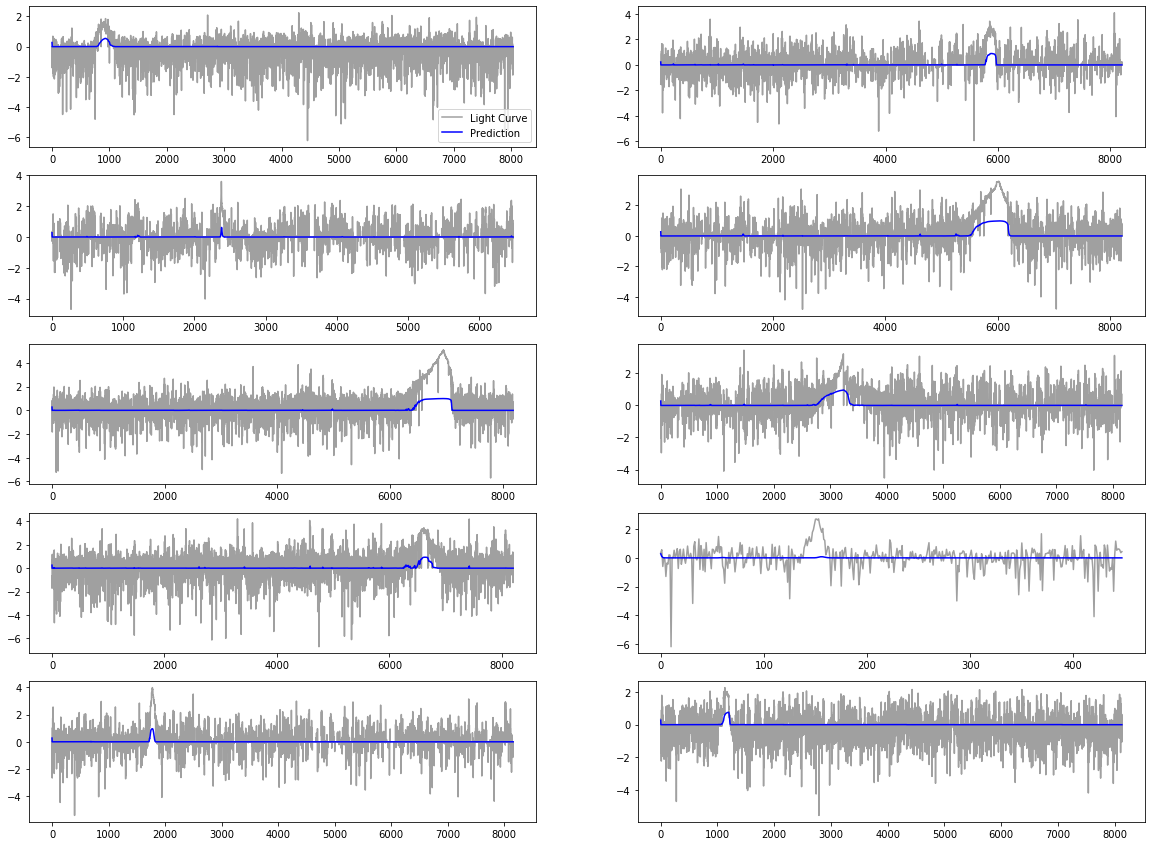

In [0]:
plot=plot_data(X_gb_events_arima, y_pred=gru_2.predict_proba(X_gb_events_arima), cols=2)
plot.savefig('/content/drive/My Drive/pTSA_microlensing/graph/gru_2_dev_arima_0_0_2_to_real.svg')
plot.show()

# GRU 2 Arima(0,0,2) (residual)

In [36]:
# GRU double layer

gru_2 = tf.keras.Sequential()

# Adding the first layer
gru_2.add(layers.GRU(units=200, return_sequences=True, input_shape=(None, 2)))
gru_2.add(layers.Dropout(0.2))

gru_2.add(layers.GRU(units=100, return_sequences=True, input_shape=(None, 200)))
gru_2.add(layers.Dropout(0.2))


# Output layer
gru_2.add(layers.Dense(units=1, activation='sigmoid'))

gru_2.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc', f1_m])
gru_2.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
gru_4 (GRU)                  (None, None, 200)         122400    
_________________________________________________________________
dropout_4 (Dropout)          (None, None, 200)         0         
_________________________________________________________________
gru_5 (GRU)                  (None, None, 100)         90600     
_________________________________________________________________
dropout_5 (Dropout)          (None, None, 100)         0         
_________________________________________________________________
dense_2 (Dense)              (None, None, 1)           101       
Total params: 213,101
Trainable params: 213,101
Non-trainable params: 0
_________________________________________________________________


In [37]:
X_train_arima = np.concatenate((X_train ,X_train-X_train_arima_0_0_2), axis=2)
X_test_arima = np.concatenate((X_test ,X_test-X_test_arima_0_0_2), axis=2)
X_dev_arima = np.concatenate((X_dev ,X_dev-X_dev_arima_0_0_2), axis=2)

X_train_arima.shape, X_test_arima.shape, X_dev_arima.shape

((500, 1000, 2), (100, 1000, 2), (100, 2000, 2))

In [38]:
reset_seed()
lc_gru_2=gru_2.fit(X_train_arima, y_train, batch_size=32, epochs=50, validation_data=(X_test_arima, y_test), verbose=1, workers=4)


Train on 500 samples, validate on 100 samples
Epoch 1/50
500/500 [==============================] - 6s 11ms/sample - loss: 0.3736 - acc: 0.9247 - f1_m: 0.2829 - val_loss: 0.1482 - val_acc: 0.9605 - val_f1_m: 0.6916
Epoch 2/50
500/500 [==============================] - 2s 4ms/sample - loss: 0.0858 - acc: 0.9713 - f1_m: 0.6208 - val_loss: 0.0881 - val_acc: 0.9659 - val_f1_m: 0.7233
Epoch 3/50
500/500 [==============================] - 2s 4ms/sample - loss: 0.0666 - acc: 0.9725 - f1_m: 0.6059 - val_loss: 0.0774 - val_acc: 0.9674 - val_f1_m: 0.7264
Epoch 4/50
500/500 [==============================] - 2s 4ms/sample - loss: 0.0660 - acc: 0.9706 - f1_m: 0.5978 - val_loss: 0.0719 - val_acc: 0.9686 - val_f1_m: 0.7247
Epoch 5/50
500/500 [==============================] - 2s 4ms/sample - loss: 0.0620 - acc: 0.9724 - f1_m: 0.6217 - val_loss: 0.0691 - val_acc: 0.9698 - val_f1_m: 0.7235
Epoch 6/50
500/500 [==============================] - 2s 4ms/sample - loss: 0.0607 - acc: 0.9734 - f1_m: 0.6216 -

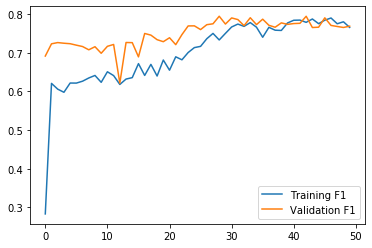

In [39]:
plot=plot_history(lc_gru_2)
# plot.savefig('/content/drive/My Drive/pTSA_microlensing/graph_arima/lc_gru_2_arima_0_0_2_res.svg')
plot.show()

Best threshold:  0.27902
Best F1-Score:  0.7742573325173014


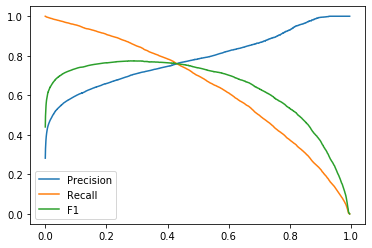

In [40]:
plot=dev_curve(gru_2, X_dev_arima)
# plot.savefig('/content/drive/My Drive/pTSA_microlensing/graph_arima/gru_2_dev_arima_0_0_2_res.svg')
plot.show()

In [41]:
gru_2.evaluate(X_dev_arima, y_dev)

100/1 [=================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

[0.048792679682374, 0.97652495, 0.5585875]

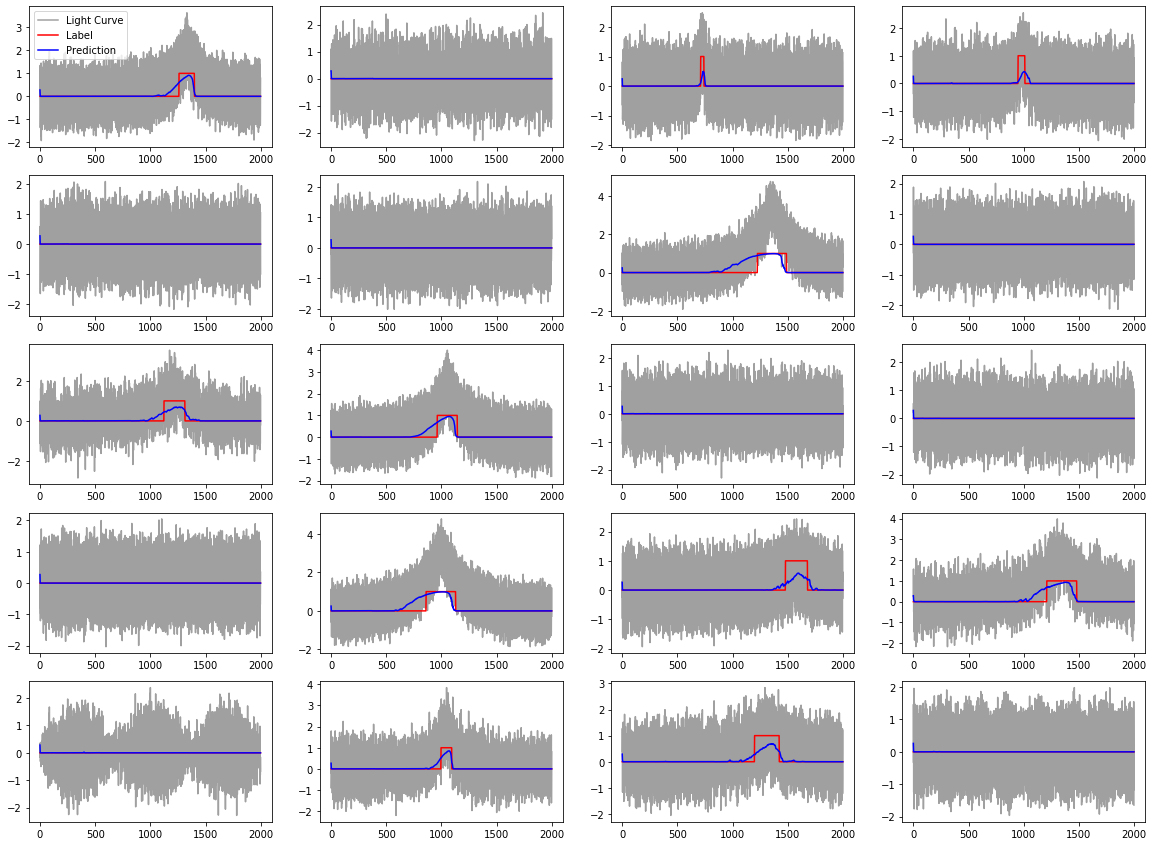

In [42]:
plot=plot_data(X_dev_arima, y_dev, gru_2.predict_proba(X_dev_arima))
# plot.savefig('/content/drive/My Drive/pTSA_microlensing/graph_arima/gru_2_dev_arima_0_0_2_res_example.svg')
plot.show()

In [43]:
X_gb_events.shape, X_gb_events_arima_0_0_2.shape

((103, 8243, 1), (10, 8243, 1))

In [44]:
X_gb_events_arima = np.concatenate((X_gb_events[:10,:,:] ,X_gb_events[:10,:,:]-X_gb_events_arima_0_0_2), axis=2)
X_gb_events_arima.shape

(10, 8243, 2)

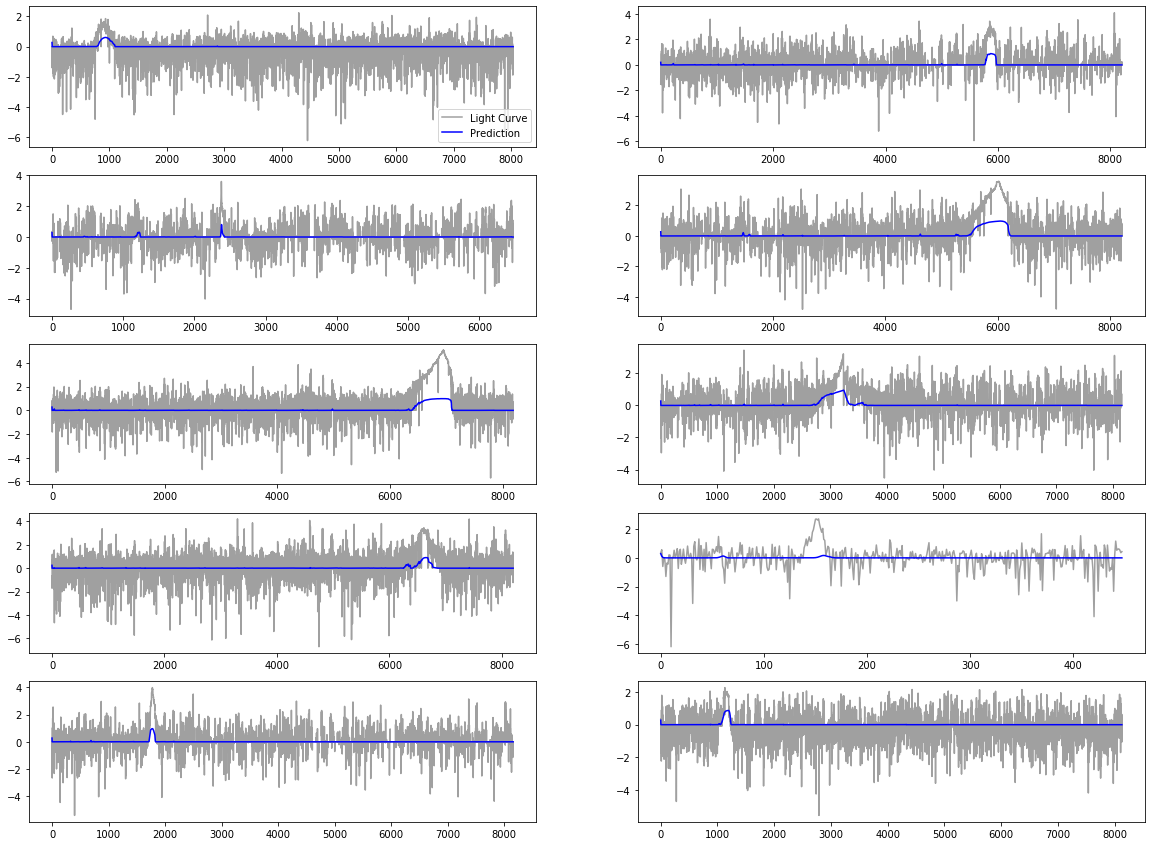

In [45]:
plot=plot_data(X_gb_events_arima, y_pred=gru_2.predict_proba(X_gb_events_arima), cols=2)
plot.savefig('/content/drive/My Drive/pTSA_microlensing/graph/gru_2_dev_arima_0_0_2_res_to_real.svg')
plot.show()

# GRU 2 ARIMA (1,0,0) (non-residual)

In [46]:
# GRU double layer

gru_2 = tf.keras.Sequential()

# Adding the first layer
gru_2.add(layers.GRU(units=200, return_sequences=True, input_shape=(None, 2)))
gru_2.add(layers.Dropout(0.2))

gru_2.add(layers.GRU(units=100, return_sequences=True, input_shape=(None, 200)))
gru_2.add(layers.Dropout(0.2))


# Output layer
gru_2.add(layers.Dense(units=1, activation='sigmoid'))

gru_2.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc', f1_m])
gru_2.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
gru_6 (GRU)                  (None, None, 200)         122400    
_________________________________________________________________
dropout_6 (Dropout)          (None, None, 200)         0         
_________________________________________________________________
gru_7 (GRU)                  (None, None, 100)         90600     
_________________________________________________________________
dropout_7 (Dropout)          (None, None, 100)         0         
_________________________________________________________________
dense_3 (Dense)              (None, None, 1)           101       
Total params: 213,101
Trainable params: 213,101
Non-trainable params: 0
_________________________________________________________________


In [47]:
X_train_arima = np.concatenate((X_train ,X_train_arima_1_0_0), axis=2)
X_test_arima = np.concatenate((X_test ,X_test_arima_1_0_0), axis=2)
X_dev_arima = np.concatenate((X_dev ,X_dev_arima_1_0_0), axis=2)

X_train_arima.shape, X_test_arima.shape, X_dev_arima.shape

((500, 1000, 2), (100, 1000, 2), (100, 2000, 2))

In [48]:
reset_seed()
lc_gru_2=gru_2.fit(X_train_arima, y_train, batch_size=32, epochs=50, validation_data=(X_test_arima, y_test), verbose=1, workers=4)


Train on 500 samples, validate on 100 samples
Epoch 1/50
500/500 [==============================] - 6s 12ms/sample - loss: 0.3593 - acc: 0.9338 - f1_m: 0.3377 - val_loss: 0.1191 - val_acc: 0.9640 - val_f1_m: 0.7001
Epoch 2/50
500/500 [==============================] - 2s 4ms/sample - loss: 0.0849 - acc: 0.9682 - f1_m: 0.5420 - val_loss: 0.0740 - val_acc: 0.9714 - val_f1_m: 0.5799
Epoch 3/50
500/500 [==============================] - 2s 4ms/sample - loss: 0.0669 - acc: 0.9722 - f1_m: 0.6094 - val_loss: 0.0729 - val_acc: 0.9697 - val_f1_m: 0.7257
Epoch 4/50
500/500 [==============================] - 2s 4ms/sample - loss: 0.0632 - acc: 0.9723 - f1_m: 0.6304 - val_loss: 0.0671 - val_acc: 0.9719 - val_f1_m: 0.7273
Epoch 5/50
500/500 [==============================] - 2s 4ms/sample - loss: 0.0612 - acc: 0.9724 - f1_m: 0.6212 - val_loss: 0.0682 - val_acc: 0.9700 - val_f1_m: 0.7309
Epoch 6/50
500/500 [==============================] - 2s 4ms/sample - loss: 0.0604 - acc: 0.9731 - f1_m: 0.6295 -

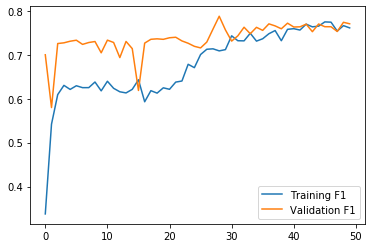

In [49]:
plot=plot_history(lc_gru_2)
# plot.savefig('/content/drive/My Drive/pTSA_microlensing/graph_arima/lc_gru_2_arima_1_0_0.svg')
plot.show()

Best threshold:  0.37230867
Best F1-Score:  0.7631317197934923


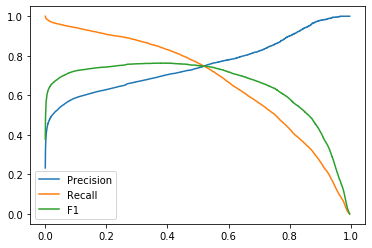

In [50]:
plot=dev_curve(gru_2, X_dev_arima)
# plot.savefig('/content/drive/My Drive/pTSA_microlensing/graph_arima/gru_2_dev_arima_1_0_0.svg')
plot.show()

In [51]:
gru_2.evaluate(X_dev_arima, y_dev)

100/1 [=================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

[0.05331919975578785, 0.97587496, 0.6189529]

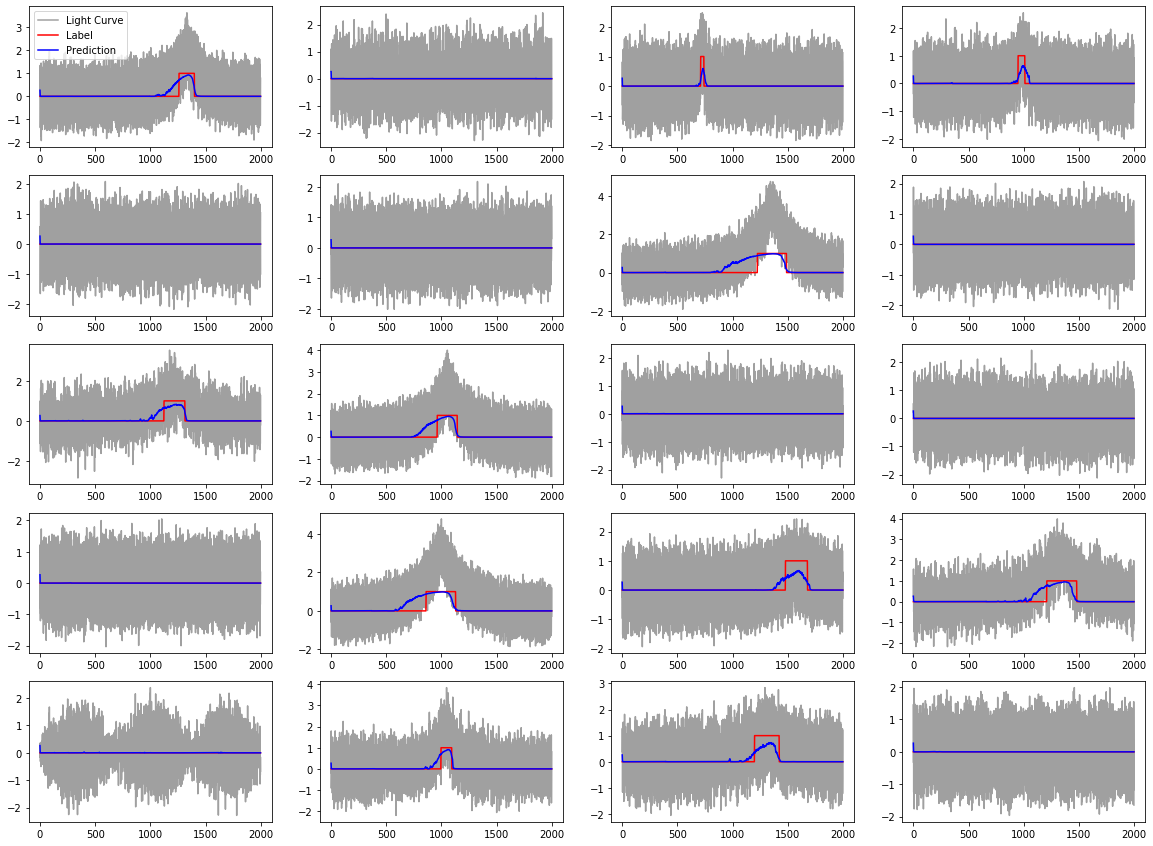

In [52]:
plot=plot_data(X_dev_arima, y_dev, gru_2.predict_proba(X_dev_arima))
# plot.savefig('/content/drive/My Drive/pTSA_microlensing/graph_arima/gru_2_dev_arima_1_0_0_example.svg')
plot.show()

In [53]:
X_gb_events.shape, X_gb_events_arima_1_0_0.shape

((103, 8243, 1), (10, 8243, 1))

In [54]:
X_gb_events_arima = np.concatenate((X_gb_events[:10,:,:] ,X_gb_events_arima_1_0_0), axis=2)
X_gb_events_arima.shape

(10, 8243, 2)

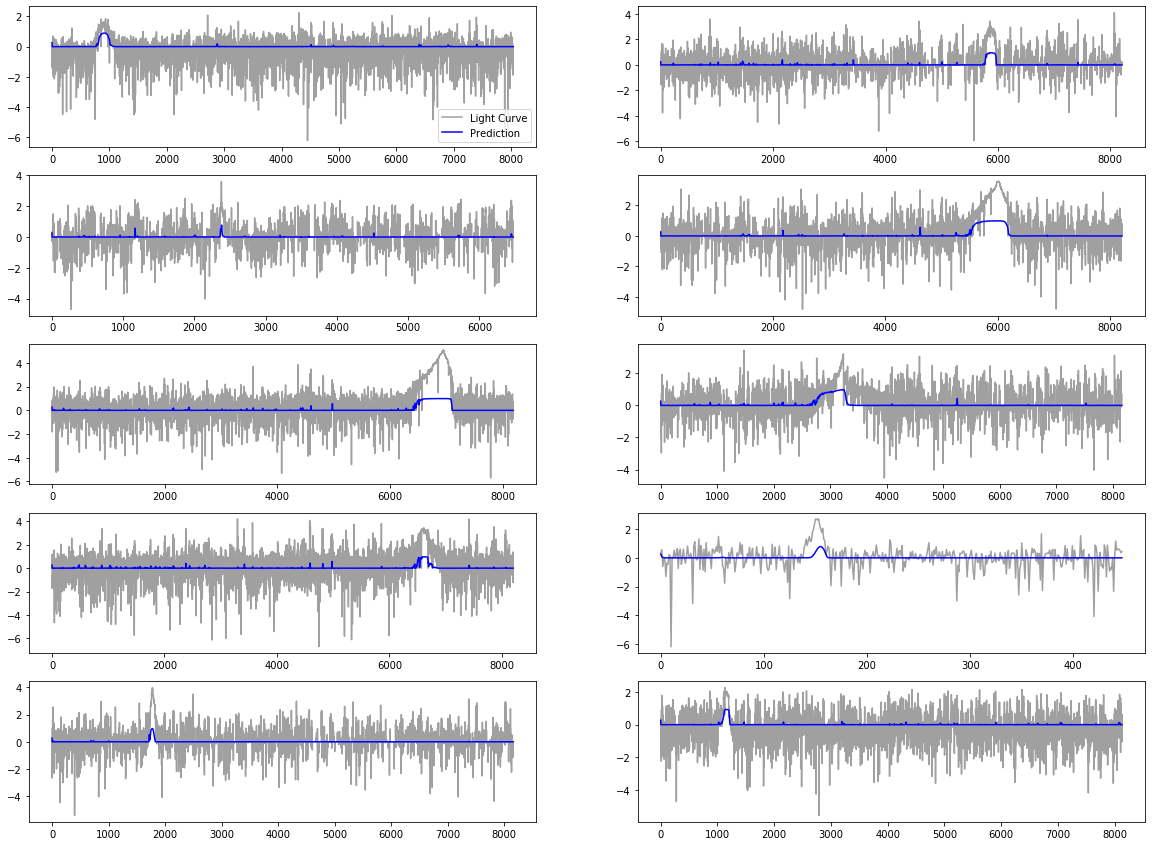

In [55]:
plot=plot_data(X_gb_events_arima, y_pred=gru_2.predict_proba(X_gb_events_arima), cols=2)
plot.savefig('/content/drive/My Drive/pTSA_microlensing/graph/gru_2_dev_arima_1_0_0_to_real.svg')
plot.show()

# GRU 2 Arima(1,0,0) (residual)

In [56]:
# GRU double layer

gru_2 = tf.keras.Sequential()

# Adding the first layer
gru_2.add(layers.GRU(units=200, return_sequences=True, input_shape=(None, 2)))
gru_2.add(layers.Dropout(0.2))

gru_2.add(layers.GRU(units=100, return_sequences=True, input_shape=(None, 200)))
gru_2.add(layers.Dropout(0.2))


# Output layer
gru_2.add(layers.Dense(units=1, activation='sigmoid'))

gru_2.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc', f1_m])
gru_2.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
gru_8 (GRU)                  (None, None, 200)         122400    
_________________________________________________________________
dropout_8 (Dropout)          (None, None, 200)         0         
_________________________________________________________________
gru_9 (GRU)                  (None, None, 100)         90600     
_________________________________________________________________
dropout_9 (Dropout)          (None, None, 100)         0         
_________________________________________________________________
dense_4 (Dense)              (None, None, 1)           101       
Total params: 213,101
Trainable params: 213,101
Non-trainable params: 0
_________________________________________________________________


In [57]:
X_train_arima = np.concatenate((X_train ,X_train-X_train_arima_1_0_0), axis=2)
X_test_arima = np.concatenate((X_test ,X_test-X_test_arima_1_0_0), axis=2)
X_dev_arima = np.concatenate((X_dev ,X_dev-X_dev_arima_1_0_0), axis=2)

X_train_arima.shape, X_test_arima.shape, X_dev_arima.shape

((500, 1000, 2), (100, 1000, 2), (100, 2000, 2))

In [58]:
reset_seed()
lc_gru_2=gru_2.fit(X_train_arima, y_train, batch_size=32, epochs=50, validation_data=(X_test_arima, y_test), verbose=1, workers=4)


Train on 500 samples, validate on 100 samples
Epoch 1/50
500/500 [==============================] - 6s 12ms/sample - loss: 0.3639 - acc: 0.9328 - f1_m: 0.3944 - val_loss: 0.1408 - val_acc: 0.9601 - val_f1_m: 0.6849
Epoch 2/50
500/500 [==============================] - 2s 4ms/sample - loss: 0.0779 - acc: 0.9705 - f1_m: 0.5445 - val_loss: 0.0871 - val_acc: 0.9660 - val_f1_m: 0.7153
Epoch 3/50
500/500 [==============================] - 2s 4ms/sample - loss: 0.0703 - acc: 0.9722 - f1_m: 0.6319 - val_loss: 0.0727 - val_acc: 0.9683 - val_f1_m: 0.7231
Epoch 4/50
500/500 [==============================] - 2s 4ms/sample - loss: 0.0652 - acc: 0.9715 - f1_m: 0.6129 - val_loss: 0.0680 - val_acc: 0.9716 - val_f1_m: 0.7216
Epoch 5/50
500/500 [==============================] - 2s 4ms/sample - loss: 0.0609 - acc: 0.9716 - f1_m: 0.6321 - val_loss: 0.0691 - val_acc: 0.9693 - val_f1_m: 0.7198
Epoch 6/50
500/500 [==============================] - 2s 4ms/sample - loss: 0.0598 - acc: 0.9726 - f1_m: 0.6133 -

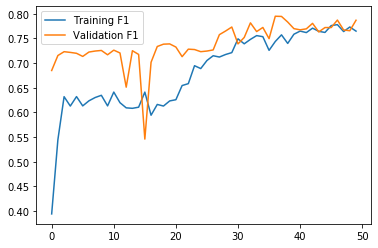

In [59]:
plot=plot_history(lc_gru_2)
# plot.savefig('/content/drive/My Drive/pTSA_microlensing/graph_arima/lc_gru_2_arima_1_0_0_res.svg')
plot.show()

Best threshold:  0.38537553
Best F1-Score:  0.7747188102969551


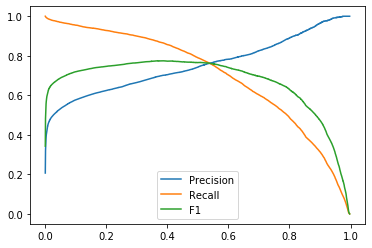

In [60]:
plot=dev_curve(gru_2, X_dev_arima)
# plot.savefig('/content/drive/My Drive/pTSA_microlensing/graph_arima/gru_2_dev_arima_1_0_0_res.svg')
plot.show()

In [61]:
gru_2.evaluate(X_dev_arima, y_dev)

100/1 [=================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

[0.050293473973870274, 0.977005, 0.61052]

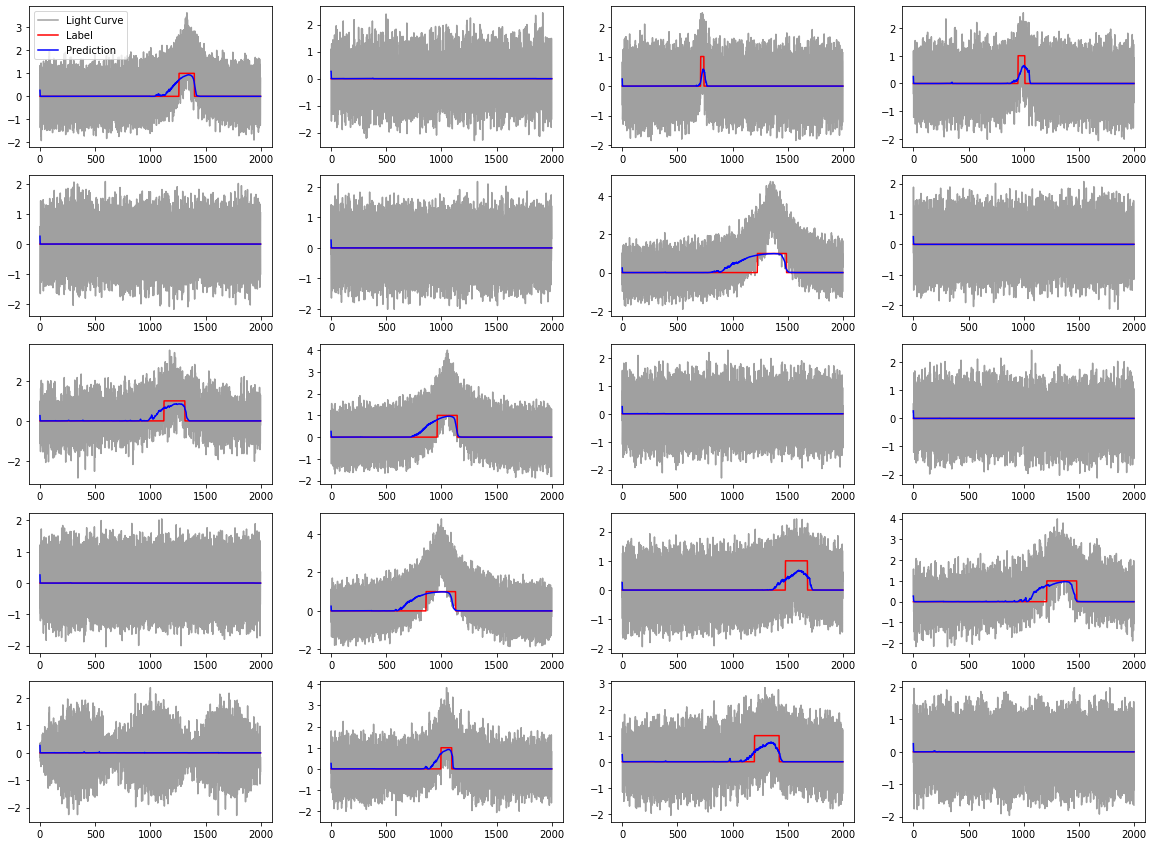

In [62]:
plot=plot_data(X_dev_arima, y_dev, gru_2.predict_proba(X_dev_arima))
# plot.savefig('/content/drive/My Drive/pTSA_microlensing/graph_arima/gru_2_dev_arima_1_0_0_res_example.svg')
plot.show()

In [63]:
X_gb_events.shape, X_gb_events_arima_1_0_0.shape

((103, 8243, 1), (10, 8243, 1))

In [64]:
X_gb_events_arima = np.concatenate((X_gb_events[:10,:,:] ,X_gb_events[:10,:,:]-X_gb_events_arima_1_0_0), axis=2)
X_gb_events_arima.shape

(10, 8243, 2)

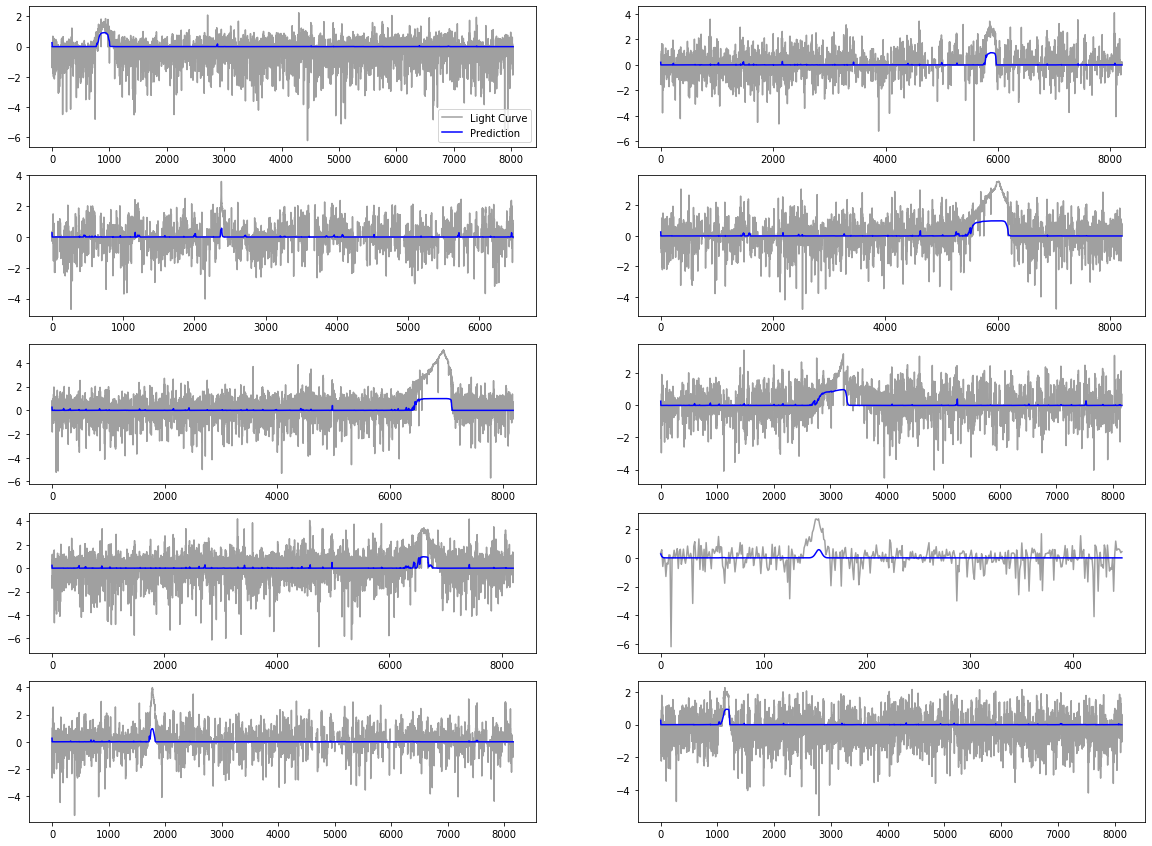

In [65]:
plot=plot_data(X_gb_events_arima, y_pred=gru_2.predict_proba(X_gb_events_arima), cols=2)
plot.savefig('/content/drive/My Drive/pTSA_microlensing/graph/gru_2_dev_arima_1_0_0_res_to_real.svg')
plot.show()

# GRU 2 ARIMA (1,0,1) (non-residual)

In [66]:
# GRU double layer

gru_2 = tf.keras.Sequential()

# Adding the first layer
gru_2.add(layers.GRU(units=200, return_sequences=True, input_shape=(None, 2)))
gru_2.add(layers.Dropout(0.2))

gru_2.add(layers.GRU(units=100, return_sequences=True, input_shape=(None, 200)))
gru_2.add(layers.Dropout(0.2))


# Output layer
gru_2.add(layers.Dense(units=1, activation='sigmoid'))

gru_2.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc', f1_m])
gru_2.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
gru_10 (GRU)                 (None, None, 200)         122400    
_________________________________________________________________
dropout_10 (Dropout)         (None, None, 200)         0         
_________________________________________________________________
gru_11 (GRU)                 (None, None, 100)         90600     
_________________________________________________________________
dropout_11 (Dropout)         (None, None, 100)         0         
_________________________________________________________________
dense_5 (Dense)              (None, None, 1)           101       
Total params: 213,101
Trainable params: 213,101
Non-trainable params: 0
_________________________________________________________________


In [67]:
X_train_arima = np.concatenate((X_train ,X_train_arima_1_0_1), axis=2)
X_test_arima = np.concatenate((X_test ,X_test_arima_1_0_1), axis=2)
X_dev_arima = np.concatenate((X_dev ,X_dev_arima_1_0_1), axis=2)

X_train_arima.shape, X_test_arima.shape, X_dev_arima.shape

((500, 1000, 2), (100, 1000, 2), (100, 2000, 2))

In [68]:
reset_seed()
lc_gru_2=gru_2.fit(X_train_arima, y_train, batch_size=32, epochs=50, validation_data=(X_test_arima, y_test), verbose=1, workers=4)


Train on 500 samples, validate on 100 samples
Epoch 1/50
500/500 [==============================] - 5s 10ms/sample - loss: 0.3595 - acc: 0.9315 - f1_m: 0.2862 - val_loss: 0.1197 - val_acc: 0.9646 - val_f1_m: 0.7104
Epoch 2/50
500/500 [==============================] - 2s 4ms/sample - loss: 0.0842 - acc: 0.9696 - f1_m: 0.5621 - val_loss: 0.0771 - val_acc: 0.9723 - val_f1_m: 0.6844
Epoch 3/50
500/500 [==============================] - 2s 4ms/sample - loss: 0.0708 - acc: 0.9730 - f1_m: 0.6260 - val_loss: 0.0703 - val_acc: 0.9717 - val_f1_m: 0.7344
Epoch 4/50
500/500 [==============================] - 2s 4ms/sample - loss: 0.0647 - acc: 0.9723 - f1_m: 0.6298 - val_loss: 0.0672 - val_acc: 0.9726 - val_f1_m: 0.7155
Epoch 5/50
500/500 [==============================] - 2s 4ms/sample - loss: 0.0622 - acc: 0.9725 - f1_m: 0.6219 - val_loss: 0.0681 - val_acc: 0.9706 - val_f1_m: 0.7346
Epoch 6/50
500/500 [==============================] - 2s 4ms/sample - loss: 0.0614 - acc: 0.9728 - f1_m: 0.6218 -

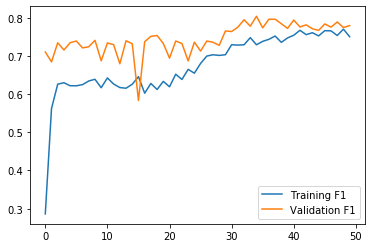

In [69]:
plot=plot_history(lc_gru_2)
# plot.savefig('/content/drive/My Drive/pTSA_microlensing/graph_arima/lc_gru_2_arima_1_0_1.svg')
plot.show()

Best threshold:  0.43871027
Best F1-Score:  0.7461333858733129


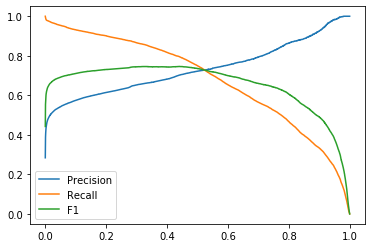

In [70]:
plot=dev_curve(gru_2, X_dev_arima)
# plot.savefig('/content/drive/My Drive/pTSA_microlensing/graph_arima/gru_2_dev_arima_1_0_1.svg')
plot.show()

In [71]:
gru_2.evaluate(X_dev_arima, y_dev)

100/1 [=================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

[0.057731743529438974, 0.97436005, 0.5590648]

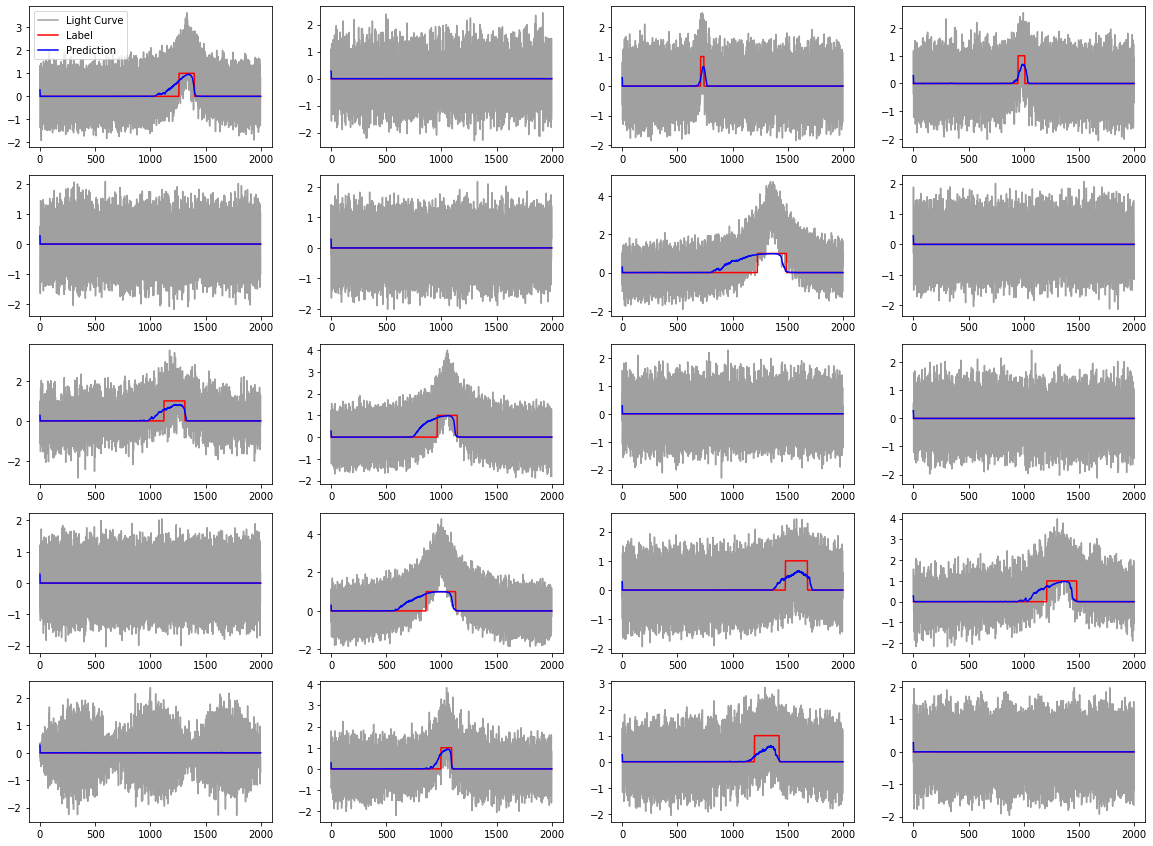

In [72]:
plot=plot_data(X_dev_arima, y_dev, gru_2.predict_proba(X_dev_arima))
# plot.savefig('/content/drive/My Drive/pTSA_microlensing/graph_arima/gru_2_dev_arima_1_0_1_example.svg')
plot.show()

In [75]:
X_gb_events.shape, X_gb_events_arima_1_0_1.shape

((103, 8243, 1), (10, 8243, 1))

In [76]:
X_gb_events_arima = np.concatenate((X_gb_events[:10,:,:] ,X_gb_events_arima_1_0_1), axis=2)
X_gb_events_arima.shape

(10, 8243, 2)

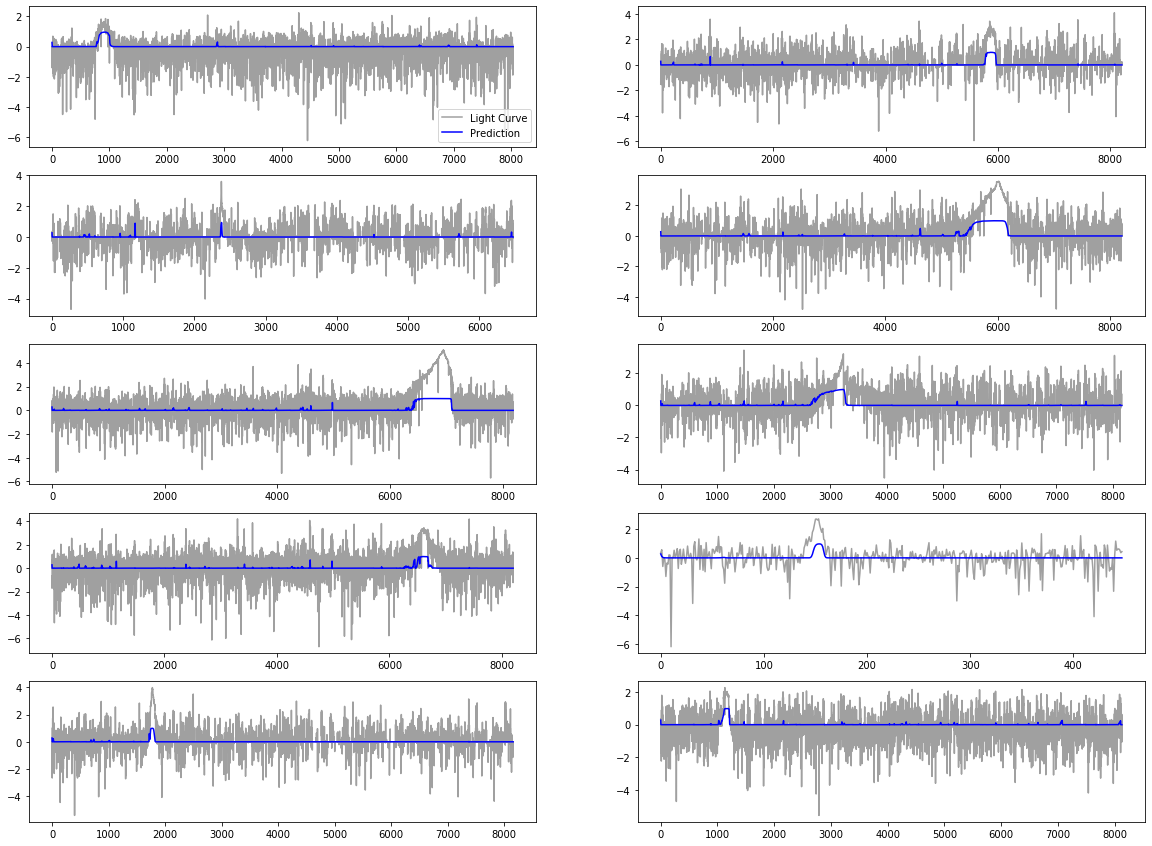

In [77]:
plot=plot_data(X_gb_events_arima, y_pred=gru_2.predict_proba(X_gb_events_arima), cols=2)
plot.savefig('/content/drive/My Drive/pTSA_microlensing/graph/gru_2_dev_arima_1_0_1_to_real.svg')
plot.show()

# GRU 2 Arima(1,0,1) (residual)

In [78]:
# GRU double layer

gru_2 = tf.keras.Sequential()

# Adding the first layer
gru_2.add(layers.GRU(units=200, return_sequences=True, input_shape=(None, 2)))
gru_2.add(layers.Dropout(0.2))

gru_2.add(layers.GRU(units=100, return_sequences=True, input_shape=(None, 200)))
gru_2.add(layers.Dropout(0.2))


# Output layer
gru_2.add(layers.Dense(units=1, activation='sigmoid'))

gru_2.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc', f1_m])
gru_2.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
gru_12 (GRU)                 (None, None, 200)         122400    
_________________________________________________________________
dropout_12 (Dropout)         (None, None, 200)         0         
_________________________________________________________________
gru_13 (GRU)                 (None, None, 100)         90600     
_________________________________________________________________
dropout_13 (Dropout)         (None, None, 100)         0         
_________________________________________________________________
dense_6 (Dense)              (None, None, 1)           101       
Total params: 213,101
Trainable params: 213,101
Non-trainable params: 0
_________________________________________________________________


In [79]:
X_train_arima = np.concatenate((X_train ,X_train-X_train_arima_1_0_1), axis=2)
X_test_arima = np.concatenate((X_test ,X_test-X_test_arima_1_0_1), axis=2)
X_dev_arima = np.concatenate((X_dev ,X_dev-X_dev_arima_1_0_1), axis=2)

X_train_arima.shape, X_test_arima.shape, X_dev_arima.shape

((500, 1000, 2), (100, 1000, 2), (100, 2000, 2))

In [80]:
reset_seed()
lc_gru_2=gru_2.fit(X_train_arima, y_train, batch_size=32, epochs=50, validation_data=(X_test_arima, y_test), verbose=1, workers=4)


Train on 500 samples, validate on 100 samples
Epoch 1/50
500/500 [==============================] - 6s 13ms/sample - loss: 0.3663 - acc: 0.9306 - f1_m: 0.3120 - val_loss: 0.1131 - val_acc: 0.9665 - val_f1_m: 0.7000
Epoch 2/50
500/500 [==============================] - 2s 4ms/sample - loss: 0.0744 - acc: 0.9730 - f1_m: 0.6114 - val_loss: 0.0870 - val_acc: 0.9668 - val_f1_m: 0.7195
Epoch 3/50
500/500 [==============================] - 2s 4ms/sample - loss: 0.0671 - acc: 0.9726 - f1_m: 0.6259 - val_loss: 0.0783 - val_acc: 0.9665 - val_f1_m: 0.7178
Epoch 4/50
500/500 [==============================] - 2s 4ms/sample - loss: 0.0667 - acc: 0.9709 - f1_m: 0.5899 - val_loss: 0.0681 - val_acc: 0.9707 - val_f1_m: 0.7243
Epoch 5/50
500/500 [==============================] - 2s 4ms/sample - loss: 0.0611 - acc: 0.9728 - f1_m: 0.6352 - val_loss: 0.0674 - val_acc: 0.9707 - val_f1_m: 0.7283
Epoch 6/50
500/500 [==============================] - 2s 4ms/sample - loss: 0.0599 - acc: 0.9728 - f1_m: 0.6163 -

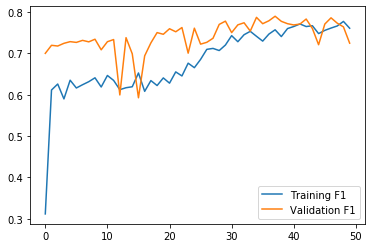

In [81]:
plot=plot_history(lc_gru_2)
# plot.savefig('/content/drive/My Drive/pTSA_microlensing/graph_arima/lc_gru_2_arima_1_0_1_res.svg')
plot.show()

Best threshold:  0.29497427
Best F1-Score:  0.7206788011495825


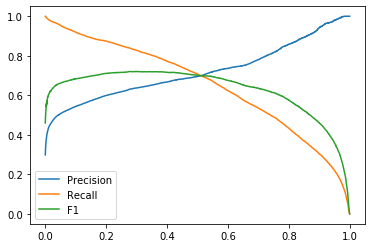

In [82]:
plot=dev_curve(gru_2, X_dev_arima)
# plot.savefig('/content/drive/My Drive/pTSA_microlensing/graph_arima/gru_2_dev_arima_1_0_1_res.svg')
plot.show()

In [83]:
gru_2.evaluate(X_dev_arima, y_dev)

100/1 [=================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

[0.06057480908930302, 0.971395, 0.65891707]

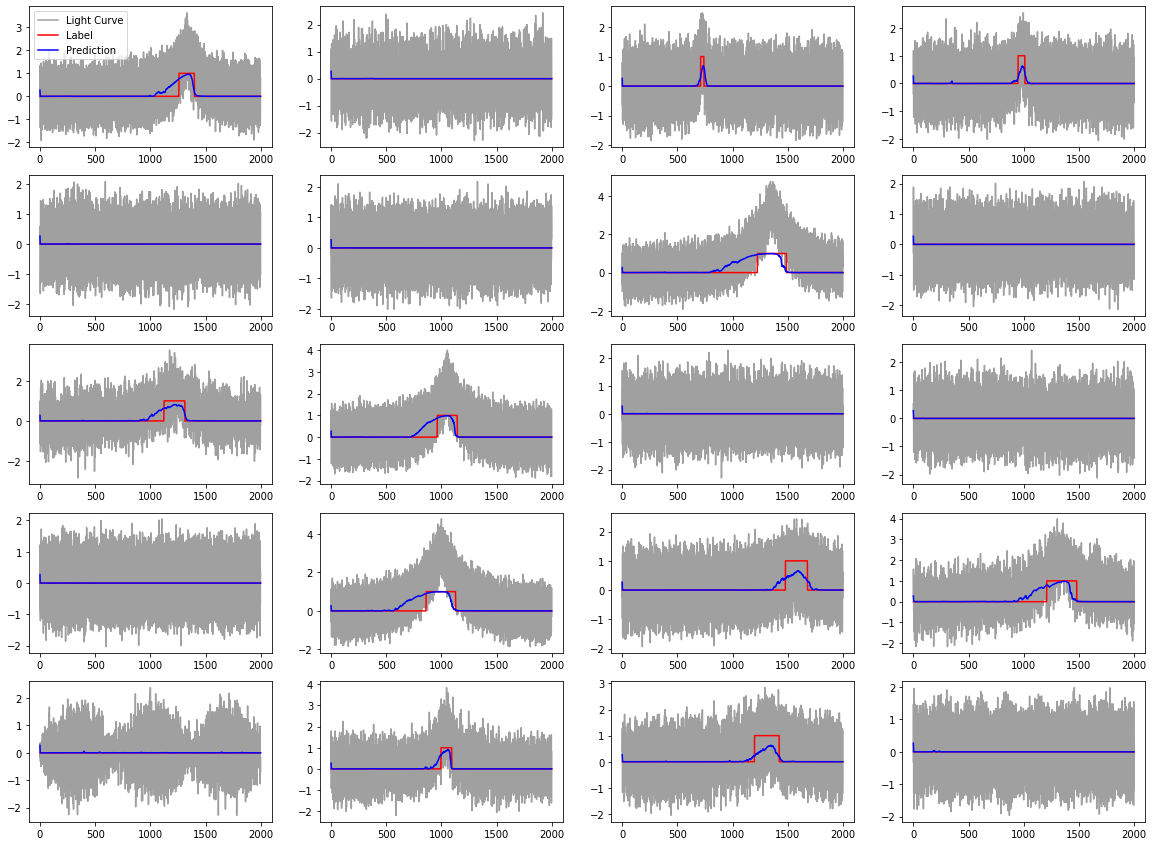

In [84]:
plot=plot_data(X_dev_arima, y_dev, gru_2.predict_proba(X_dev_arima))
# plot.savefig('/content/drive/My Drive/pTSA_microlensing/graph_arima/gru_2_dev_arima_1_0_1_res_example.svg')
plot.show()

In [85]:
X_gb_events.shape, X_gb_events_arima_1_0_1.shape

((103, 8243, 1), (10, 8243, 1))

In [86]:
X_gb_events_arima = np.concatenate((X_gb_events[:10,:,:] ,X_gb_events[:10,:,:]-X_gb_events_arima_1_0_1), axis=2)
X_gb_events_arima.shape

(10, 8243, 2)

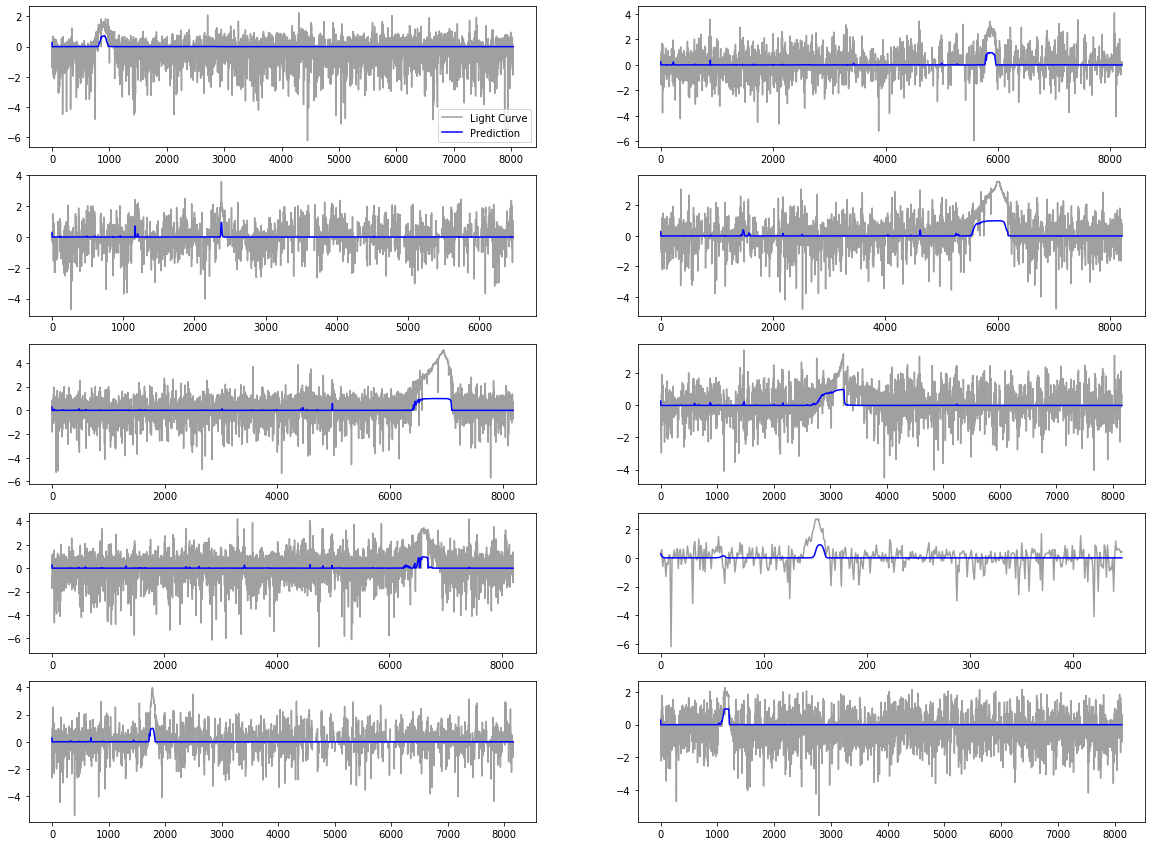

In [87]:
plot=plot_data(X_gb_events_arima, y_pred=gru_2.predict_proba(X_gb_events_arima), cols=2)
plot.savefig('/content/drive/My Drive/pTSA_microlensing/graph/gru_2_dev_arima_1_0_1_res_to_real.svg')
plot.show()